In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
movie_metadata = pd.read_csv('movie.metadata.tsv', sep='\t', header=None)
movie_metadata = movie_metadata.reset_index(drop=True)
movie_metadata.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date", "Movie box office revenue", "Movie runtime", "Movie languages", "Movie countries", "Movie genres"]
movie_metadata

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [11]:
columns_to_clean = ["Movie languages", "Movie countries", "Movie genres"]
for i in columns_to_clean:
    movie_metadata[i] = movie_metadata[i].apply(lambda x: type(x))

movie_metadata

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,<class 'NoneType'>,<class 'NoneType'>,<class 'str'>
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,<class 'NoneType'>,<class 'NoneType'>,<class 'str'>
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,<class 'NoneType'>,<class 'NoneType'>,<class 'str'>
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,<class 'NoneType'>,<class 'NoneType'>,<class 'str'>
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,<class 'NoneType'>,<class 'NoneType'>,<class 'str'>
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011,NaN,120.0,<class 'NoneType'>,<class 'NoneType'>,<class 'str'>
81737,34980460,/m/0g4pl34,Knuckle,2011,NaN,96.0,<class 'NoneType'>,<class 'NoneType'>,<class 'str'>
81738,9971909,/m/02pygw1,Another Nice Mess,1972,NaN,66.0,<class 'NoneType'>,<class 'NoneType'>,<class 'str'>
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992,NaN,150.0,<class 'NoneType'>,<class 'NoneType'>,<class 'str'>


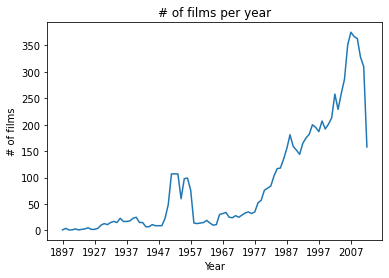

In [3]:
clean = movie_metadata
clean["Movie release date"] = clean["Movie release date"].str.extract(r'^(\d{4})', expand=False)
clean = clean[clean["Movie box office revenue"].notna()]
clean = clean.groupby("Movie release date").agg('count')["Movie box office revenue"].reset_index()
clean = clean[clean["Movie release date"].astype(int) > 1500]

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.plot(clean["Movie release date"], clean["Movie box office revenue"])
# ax.xaxis_date()     # interpret the x-axis values as dates
plt.xlabel('Year')
plt.ylabel('# of films')
plt.title("# of films per year")
plt.show()